# Parkinson's Disease Classification

In [1]:
!pip install patool

In [2]:
import pandas as pd
import ehrapy as ep
import numpy as np
import warnings
import patoolib
import os
warnings.filterwarnings("ignore")

Installed version 0.2.0 of ehrapy is newer than the latest release 0.1.0! You are running a 
nightly version and features may break!

Model en_core_web_md is not installed. Refer to the ehrapy installation instructions if 
required.

In [3]:
pd.set_option("display.max_columns", None)

## Getting the dataset

In [4]:
!wget -nc http://archive.ics.uci.edu/ml/machine-learning-databases/00470/pd_speech_features.rar

File ‘pd_speech_features.rar’ already there; not retrieving.



In [5]:
base_directory = os.getcwd()
patoolib.extract_archive("pd_speech_features.rar", outdir=base_directory, interactive = False)

patool: Extracting pd_speech_features.rar ...
patool: running /usr/local/bin/rar x -p- -y -- /Users/xinyuezhang/ehrapy-datasets/parkinson's_disease_classification/pd_speech_features.rar
patool:     with cwd='/Users/xinyuezhang/ehrapy-datasets/parkinson'\''s_disease_classification'
patool: ... pd_speech_features.rar extracted to `/Users/xinyuezhang/ehrapy-datasets/parkinson's_disease_classification'.


"/Users/xinyuezhang/ehrapy-datasets/parkinson's_disease_classification"

# Data Wrangling

In [6]:
data = pd.read_csv("pd_speech_features.csv", sep=",", header=1)

Since the dataset does not have a measurement ID we add one.

In [7]:
data["measurement_id"] = range(1, len(data) + 1)

In [8]:
data.set_index("measurement_id", inplace=True)

In [9]:
data.to_csv("parkinson's_disease_classification_prepared.csv")

## ehrapy sanity check

In [10]:
columns_obs_only=["id"]

In [11]:
adata = ep.io.read("parkinson's_disease_classification_prepared.csv",
                   extension="csv",
                   index_column="measurement_id",
                   columns_obs_only=columns_obs_only)

In [12]:
adata=ep.pp.encode(adata,autodetect=True)

Updating layer originals ... ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100%

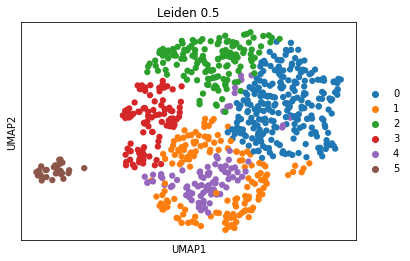

In [13]:
ep.pp.norm_scale(adata)
ep.pp.pca(adata)
ep.pp.neighbors(adata)
ep.tl.umap(adata)
ep.tl.leiden(adata, resolution=0.5, key_added="leiden_0_5")
ep.pl.umap(adata, color=["leiden_0_5"], title="Leiden 0.5")

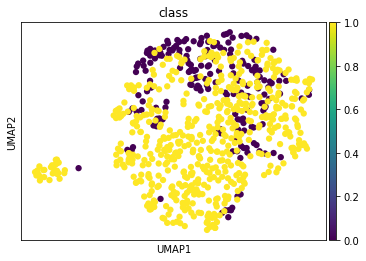

In [14]:
ep.pl.umap(adata, color=["class"], ncols=1, wspace=0.75)

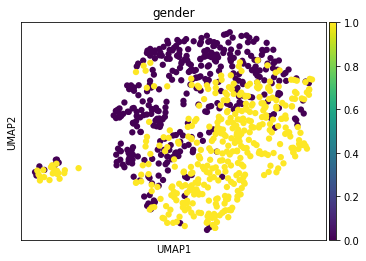

In [15]:
ep.pl.umap(adata, color=["gender"], ncols=1, wspace=0.75)